In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
DATA_PATH = Path() / "data"
DATA_PATH.mkdir(parents=True,exist_ok=True)

def load_data(filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    return pd.read_csv(csv_path,encoding=encoding)

def save_data(data, filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    data.to_csv(csv_path, index=False,encoding='ISO-8859-1')

PLOT_PATH = Path() / "plot"
PLOT_PATH.mkdir(parents=True,exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = PLOT_PATH / f"{fig_id}.{fig_extension}"
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
data = load_data("McDonald_s_Reviews_Cleaned_Classified.csv")
data

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,processed_review_basic,rating_numeric,rating_numerical,state,Topic
0,29732,McDonald's,Fast food restaurant,"1415 E State Rd, Fern Park, FL 32730, United S...",28.655350,-81.342692,"1,618",3 years ago,Neutral,3 stars,neutral,3,3.0,FL,1
1,32175,McDonald's,Fast food restaurant,"632 S R L Thornton Freeway Service Rd, Dallas,...",32.744596,-96.812286,"2,658",4 years ago,Nice,4 stars,nice,4,4.0,TX,5
2,17293,McDonald's,Fast food restaurant,"702-2 Haddonfield-Berlin Rd, Voorhees Township...",39.852059,-74.981099,933,a year ago,These are the slowest off-task workers I've ev...,1 star,slowest task worker i've ever seen. stop multi...,1,1.0,NJ,3
3,13768,McDonald's,Fast food restaurant,"6875 Sand Lake Rd, Orlando, FL 32819, United S...",28.450387,-81.471414,"19,671",3 months ago,This McDonaldï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½...,2 stars,mcdonald unique pasta pizza bar arcade upstair...,2,2.0,FL,7
4,25283,McDonald's,Fast food restaurant,"7010 Bradlick Shopping Center, Annandale, VA 2...",38.812823,-77.185055,595,5 years ago,Terrible,1 star,terrible,1,1.0,VA,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3260,7121,McDonald's,Fast food restaurant,"550 Lawrence Expy, Sunnyvale, CA 94086, United...",37.385495,-121.995421,"1,562",a year ago,Like always very pleasing but the area outdoor...,3 stars,like always pleasing area outdoor use tidying....,3,3.0,CA,1
3261,14963,McDonald's,Fast food restaurant,"111 Madison St, Oak Park, IL 60302, United States",41.879656,-87.777913,"1,454",5 years ago,Jus go 4 the drinks im 35 out grown the food,3 stars,jus go 4 drink im 35 grown food,3,3.0,IL,6
3262,9685,McDonald's,Fast food restaurant,"1916 M St NW, Washington, DC 20036, United States",38.905456,-77.044235,"1,269",3 years ago,The Service is Excellent,5 stars,service excellent,5,5.0,DC,6
3263,19282,McDonald's,Fast food restaurant,"621 Broadway, Newark, NJ 07104, United States",40.771910,-74.161475,"1,564",2 years ago,I go to mc Donald only drive through and my fr...,3 stars,go mc donald drive friend took burger king tru...,3,3.0,NJ,0


In [7]:
# Importing the necessary library
from textblob import TextBlob

# Function to apply sentiment analysis
def apply_sentiment_analysis(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [8]:
# Applying the function to the 'processed_review_basic' column
data['Sentiment'] = data['processed_review_basic'].apply(apply_sentiment_analysis)

data.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,processed_review_basic,rating_numeric,rating_numerical,state,Topic,Sentiment
0,29732,McDonald's,Fast food restaurant,"1415 E State Rd, Fern Park, FL 32730, United S...",28.655350,-81.342692,"1,618",3 years ago,Neutral,3 stars,neutral,3,3.0,FL,1,0.0000
1,32175,McDonald's,Fast food restaurant,"632 S R L Thornton Freeway Service Rd, Dallas,...",32.744596,-96.812286,"2,658",4 years ago,Nice,4 stars,nice,4,4.0,TX,5,0.6000
2,17293,McDonald's,Fast food restaurant,"702-2 Haddonfield-Berlin Rd, Voorhees Township...",39.852059,-74.981099,933,a year ago,These are the slowest off-task workers I've ev...,1 star,slowest task worker i've ever seen. stop multi...,1,1.0,NJ,3,0.0000
3,13768,McDonald's,Fast food restaurant,"6875 Sand Lake Rd, Orlando, FL 32819, United S...",28.450387,-81.471414,"19,671",3 months ago,This McDonaldï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½...,2 stars,mcdonald unique pasta pizza bar arcade upstair...,2,2.0,FL,7,0.3125
4,25283,McDonald's,Fast food restaurant,"7010 Bradlick Shopping Center, Annandale, VA 2...",38.812823,-77.185055,595,5 years ago,Terrible,1 star,terrible,1,1.0,VA,4,-1.0000


count    3265.000000
mean        0.183136
std         0.453545
min        -1.000000
25%        -0.050000
50%         0.136364
75%         0.500000
max         1.000000
Name: Sentiment, dtype: float64

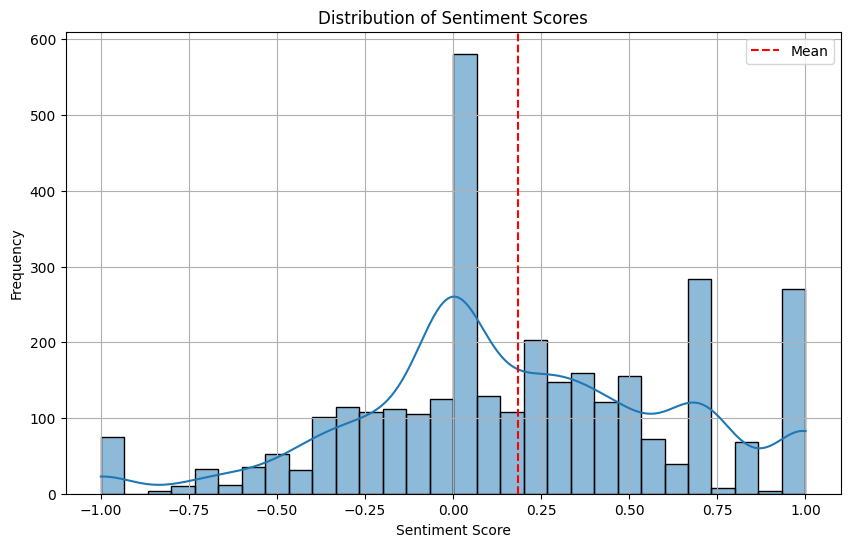

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics of the Sentiment scores
sentiment_summary = data['Sentiment'].describe()

# Plotting the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(data['Sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.axvline(x=data['Sentiment'].mean(), color='r', linestyle='--', label='Mean')
plt.legend()

sentiment_summary


In [11]:
# Define thresholds for categorizing sentiments
positive_threshold = 0.05
negative_threshold = -0.05

# Function to categorize sentiment
def categorize_sentiment(score):
    if score > positive_threshold:
        return "positive"
    elif score < negative_threshold:
        return "negative"
    else:
        return "neutral"

# Apply the function to the Sentiment column
data['Sentiment_Category'] = data['Sentiment'].apply(categorize_sentiment)

# Display the first few rows to verify the new column
data[['Sentiment', 'Sentiment_Category']].head()


,Sentiment,Sentiment_Category
0,0.0000,neutral
1,0.6000,positive
2,0.0000,neutral
3,0.3125,positive
4,-1.0000,negative


In [12]:
save_data(data,"McDonald_s_Reviews_Cleaned_Classified_Sentiment.csv")